#Predictive Analysis : Heart Failure

Proyek ini berfokus pada analisis prediktif dalam domain kesehatan, dengan perhatian khusus pada penyakit kardiovaskular, terutama gagal jantung. Penyakit kardiovaskular (CVD) adalah salah satu masalah kesehatan paling mendesak di seluruh dunia, menjadi penyebab utama kematian dan morbiditas global. Sebagai contoh, berdasarkan laporan dari Organisasi Kesehatan Dunia (WHO), penyakit kardiovaskular bertanggung jawab atas sekitar 17 juta kematian setiap tahun.

Gagal jantung adalah salah satu akibat yang paling umum dari CVD. Karena itu, deteksi dini sangat penting untuk mengurangi kematian prematur dan meningkatkan kualitas hidup penderita. Dalam konteks ini, machine learning menawarkan peluang untuk memberikan solusi berbasis data untuk prediksi dini penyakit jantung. Dataset yang digunakan dalam proyek ini terdiri dari 12 fitur kesehatan yang dapat dimanfaatkan untuk membangun model prediktif dalam mendeteksi risiko penyakit jantung.

Orang yang memiliki risiko tinggi terhadap penyakit kardiovaskular, seperti mereka yang menderita hipertensi, diabetes, hiperlipidemia, dan kondisi medis lainnya, termasuk dalam kelompok yang paling diuntungkan dari penggunaan deteksi dini berbasis machine learning ini. Harapannya adalah model ini dapat membantu dalam mengidentifikasi kelompok pasien yang memerlukan penanganan lebih awal untuk mencegah komplikasi lebih lanjut.

Referensi :
* [1] World Health Organization (2021). Cardiovascular Diseases (CVDs) [Online]. Available at: https://www.who.int/cardiovascular_diseases/en/
* [2] https://www.sciencedirect.com/science/article/pii/S2001037016300460

## Business Understanding

### Problem Statements

Permasalahan utama yang dihadapi dalam proyek ini adalah : Bagaimana memprediksi apakah seorang pasien memiliki penyakit jantung berdasarkan data riwayat kesehatannya?
Dalam konteks ini, deteksi dini sangat penting karena memungkinkan untuk mengambil tindakan medis yang tepat sebelum komplikasi yang lebih serius berkembang. Prediksi yang akurat dapat memberikan kesempatan bagi pasien untuk mendapatkan perawatan yang lebih efektif.

### Goals

Tujuan utama dari proyek ini adalah membangun model machine learning yang dapat digunakan untuk:
*   Mendeteksi apakah seseorang memiliki penyakit jantung berdasarkan data kesehatan mereka.
*   Mengurangi risiko kematian dini dengan deteksi dini dan intervensi yang lebih cepat.
*   Meningkatkan akurasi prediksi melalui pemanfaatan algoritma machine learning yang optimal.





### Solution Statements

Untuk mencapai tujuan ini, algoritma machine learning akan diterapkan, yaitu K-Nearest Neighbors (K-NN).
K-Nearest Neighbor (K-NN) adalah salah satu algoritma klasifikasi yang paling mudah dipahami. Algoritma ini bekerja dengan memprediksi kelas untuk titik data baru berdasarkan K tetangga terdekat dari titik data tersebut. Jarak antara data dihitung menggunakan metrik seperti jarak Euclidean, di mana data terdekat dengan kategori mayoritas akan menjadi prediksi model.

### Data Understanding

Dataset yang digunakan dalam proyek machine learning ini terdiri dari 918 data observasi yang diperoleh dari Kaggle dan UCI Machine Learning (Repository : http://archive.ics.uci.edu/dataset/45/heart+disease) Dataset ini mencakup 11 fitur utama yang dapat dimanfaatkan untuk memprediksi kemungkinan terjadinya penyakit jantung.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [4]:
# Load dataset
heart_disease = pd.read_csv('drive/MyDrive/Colab Notebooks/heart.csv')
heart_disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
# Data Exploration
print("\nData Summary:\n", heart_disease.describe())
print("\nDataset Info:\n")
heart_disease.info()


Data Summary:
               Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  

Dataset Info:

<class 'pandas.core.frame.DataF

Pada bagian ini, kita mengeksplorasi data untuk mendapatkan rangkuman statistik dan melihat informasi tentang tipe data serta apakah ada nilai yang hilang.

In [8]:
# Check missing values
if heart_disease.isnull().sum().sum() == 0:
    print("\nNo missing values detected.\n")


No missing values detected.



### Data Visualization
Visualisasi distribusi variabel target akan membantu kita memahami proporsi individu yang memiliki penyakit jantung di dalam dataset.

Pada tahap ini, kita membuat beberapa grafik untuk memahami distribusi data:

* Distribusi Penyakit Jantung: Menunjukkan proporsi individu yang memiliki atau tidak memiliki penyakit jantung dalam dataset.
* Matriks Korelasi: Grafik heatmap ini menunjukkan hubungan antara fitur-fitur dataset.
* Distribusi Umur, Tekanan Darah, Kolesterol, dan Detak Jantung Maksimal: Setiap fitur visualisasi menunjukkan distribusi data untuk masing-masing variabel kunci.

<ipython-input-10-3e1aad29b130>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=heart_disease, palette=['#66b3ff', '#ff6666'])


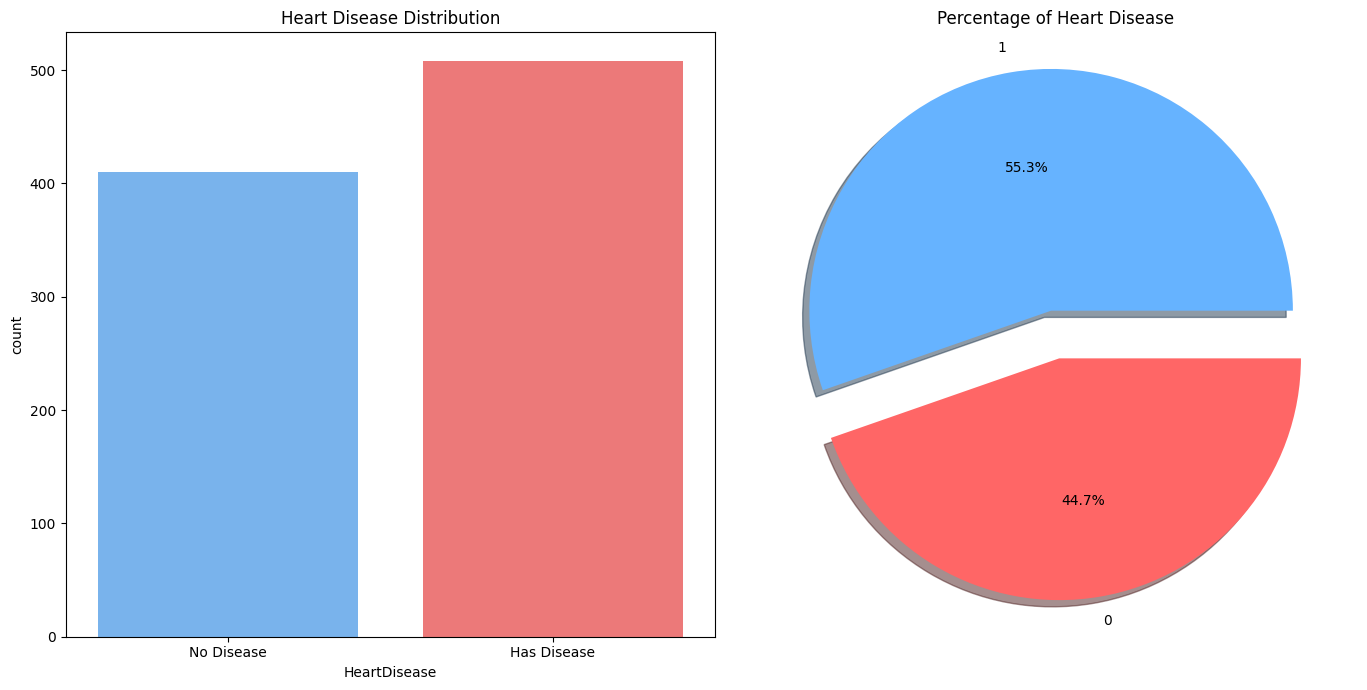

In [10]:
# Distribution of Target (HeartDisease)
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.countplot(x='HeartDisease', data=heart_disease, palette=['#66b3ff', '#ff6666'])
plt.title('Heart Disease Distribution')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Has Disease'])

plt.subplot(1, 2, 2)
heart_disease['HeartDisease'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True, colors=['#66b3ff', '#ff6666'])
plt.title('Percentage of Heart Disease')
plt.ylabel('')

plt.tight_layout()
plt.show()

Pada bagian ini, kita melakukan persiapan data:

* One-Hot Encoding digunakan untuk mengubah variabel kategorikal menjadi numerik.
* Train-Test Split digunakan untuk membagi dataset menjadi data latih dan data uji.
* Scaling: Kita melakukan scaling untuk memastikan setiap fitur berada dalam skala yang sama.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    bool   
 8   ChestPainType_ATA  918 non-null    bool   
 9   ChestPainType_NAP  918 non-null    bool   
 10  ChestPainType_TA   918 non-null    bool   
 11  RestingECG_Normal  918 non-null    bool   
 12  RestingECG_ST      918 non-null    bool   
 13  ExerciseAngina_Y   918 non-null    bool   
 14  ST_Slope_Flat      918 non-null    bool   
 15  ST_Slope_Up        918 non-null    bool   
dtypes: bool(9), float64(1), in

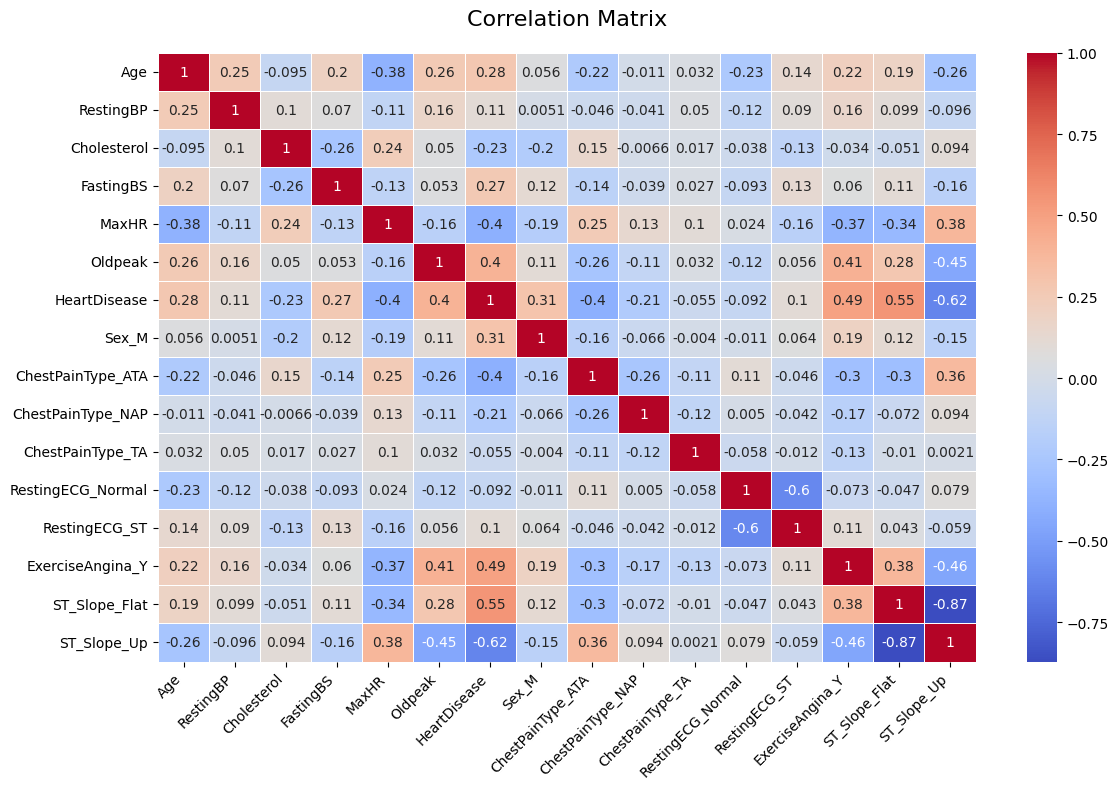

In [20]:
# One-Hot Encoding untuk kolom kategorikal
heart_disease_encoded = pd.get_dummies(heart_disease, drop_first=True)

# Cek apakah encoding berhasil
heart_disease_encoded.info()

# Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = heart_disease_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


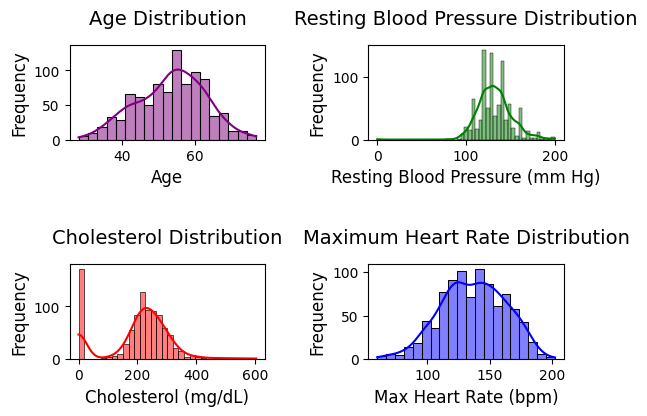

In [22]:
# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(heart_disease_encoded['Age'], kde=True, color='purple')
plt.title('Age Distribution', fontsize=14, pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Resting Blood Pressure
plt.subplot(2, 2, 2)
sns.histplot(heart_disease_encoded['RestingBP'], kde=True, color='green')
plt.title('Resting Blood Pressure Distribution', fontsize=14, pad=15)
plt.xlabel('Resting Blood Pressure (mm Hg)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Cholesterol
plt.subplot(2, 2, 3)
sns.histplot(heart_disease_encoded['Cholesterol'], kde=True, color='red')
plt.title('Cholesterol Distribution', fontsize=14, pad=15)
plt.xlabel('Cholesterol (mg/dL)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Max Heart Rate
plt.subplot(2, 2, 4)
sns.histplot(heart_disease_encoded['MaxHR'], kde=True, color='blue')
plt.title('Maximum Heart Rate Distribution', fontsize=14, pad=15)
plt.xlabel('Max Heart Rate (bpm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout(pad=3.0)
plt.show()

### Data Preparation
Kami akan memisahkan data menjadi variabel fitur (X) dan variabel target (y), kemudian membagi data menjadi set pelatihan dan pengujian. Setelah itu, kami akan melakukan scaling pada fitur menggunakan StandardScaler.


In [23]:
# Feature Selection
X = heart_disease_encoded.drop(columns='HeartDisease')
y = heart_disease_encoded['HeartDisease']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling
Model yang dipilih untuk proyek ini adalah K-Nearest Neighbors (KNN). Kami akan melatih model KNN pada data yang telah diskalakan dan kemudian melakukan prediksi pada set data pengujian.


In [26]:
# KNN with Cross-Validation to select optimal K
param_grid = {'n_neighbors': np.arange(1, 21)}
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_cv.fit(X_train_scaled, y_train)

print(f"Optimal number of neighbors: {knn_cv.best_params_['n_neighbors']}")

# Train the KNN model with optimal K
knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

Optimal number of neighbors: 19


Kita menggunakan algoritma K-Nearest Neighbors (KNN) untuk memprediksi penyakit jantung dan menggunakan GridSearchCV untuk mencari jumlah tetangga (K) yang optimal.

### Evaluasi Model
Pada bagian ini, kita mengevaluasi model dengan beberapa metrik:
* Confusion Matrix: Tabel ini menunjukkan prediksi benar dan salah untuk setiap kelas.
* Akurasi: Mengukur seberapa baik model dalam melakukan prediksi yang benar.
* ROC Curve dan AUC Score: Grafik ini menunjukkan keseimbangan antara tingkat positif palsu dan tingkat positif benar.
*Pengaruh K-Value pada Akurasi: Grafik ini menunjukkan bagaimana perubahan nilai K memengaruhi akurasi model.



Confusion Matrix:
 [[68  9]
 [12 95]]

Accuracy: 88.59%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



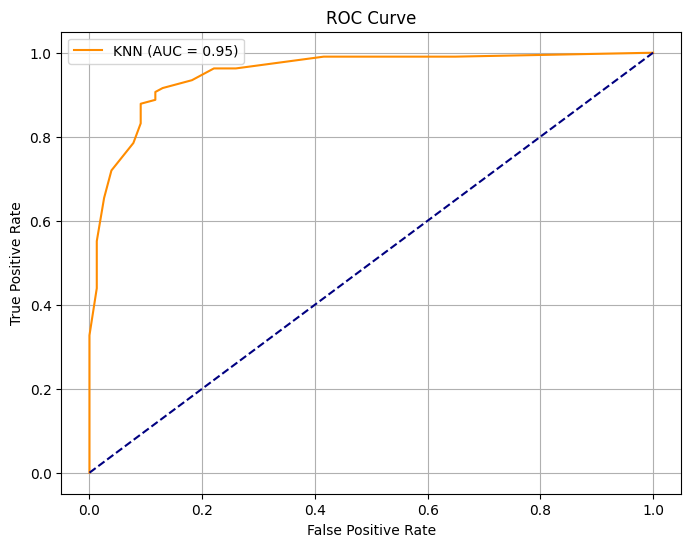

In [30]:
# Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve and AUC Score
y_pred_prob = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


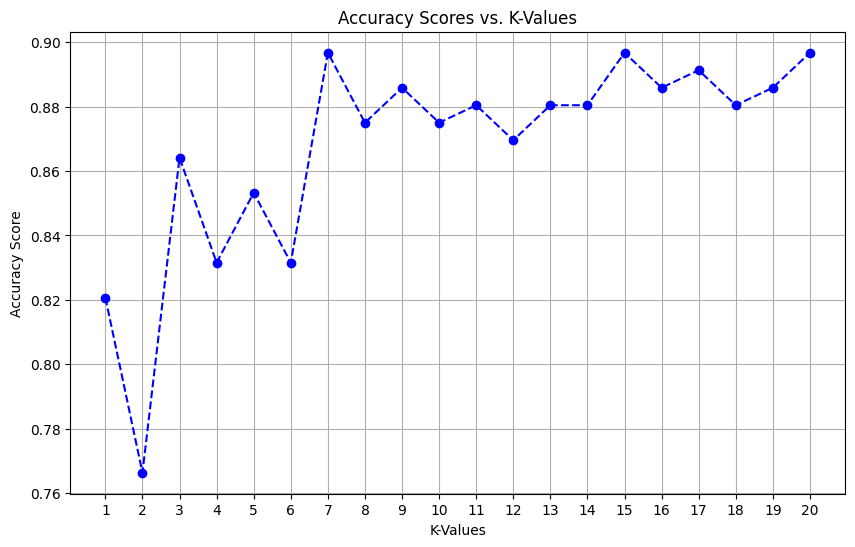

In [29]:

# Visualizing KNN Model's Performance
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    accuracy_scores.append(accuracy_score(y_test, knn_temp.predict(X_test_scaled)))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='--', color='b')
plt.title('Accuracy Scores vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Accuracy Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### Additional Evaluation

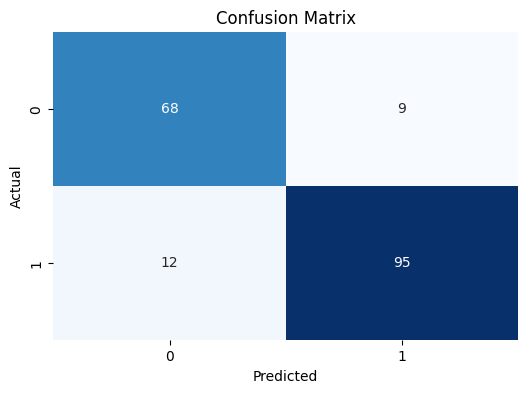

In [31]:
# Confusion Matrix as Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Pada bagian terakhir, kita menampilkan confusion matrix sebagai heatmap untuk memberikan tampilan visual yang lebih jelas tentang prediksi model.